## Lexical Retrieval

we can use the script lexical_retrieval.py to generate tf-if matrix and look for top 5 words for a query. 
we take the example 3 queries: 

QUERY1 = "magic wand"
QUERY2 = "Harry be careful!"
QUERY3 = "Voldemort is here"

the results are: 

```
--------------------------------------------------
Top 5 passages for query: 'magic wand'
--------------------------------------------------

1. Score: 0.7215
Passage: a magic beyond all we do here

2. Score: 0.6248
Passage: a magic wand this was what harry had been really looking forward to

3. Score: 0.5020
Passage: good wand that one

4. Score: 0.4641
Passage: harry took the wand

5. Score: 0.4528
Passage: there was a lot more to magic as harry quickly found out than waving your wand and saying a few funny words
--------------------------------------------------
--------------------------------------------------
Top 5 passages for query: 'Harry be careful!'
--------------------------------------------------

1. Score: 0.6380
Passage: you want to be more careful said snape

2. Score: 0.6149
Passage: right follow me but careful now

3. Score: 0.6145
Passage: you want to be careful with those ron warned harry

4. Score: 0.5191
Passage: id be careful if i were you potter he said slowly

5. Score: 0.4341
Passage: there are more important things friendship and bravery and oh harry be careful
--------------------------------------------------
--------------------------------------------------
Top 5 passages for query: 'Voldemort is here'
--------------------------------------------------

1. Score: 1.0000
Passage: voldemort

2. Score: 0.7835
Passage: all right voldemort

3. Score: 0.7558
Passage: it wasnt even voldemort

4. Score: 0.6005
Passage: voldemort had powers i will never have

5. Score: 0.5875
Passage: screeched voldemort
--------------------------------------------------
```





**Main issue with TFIDF:**
1. Semantic Blindness: Treats words as independent tokens without understanding meaning (e.g., "car" vs "automobile" as unrelated terms).
2. Context Ignorance: Fails to capture word order and contextual meaning ("bank" as financial institution vs river edge).
3. Document Length Bias: Favors longer documents due to higher term frequency counts.
4. Sparsity Issues: Creates high-dimensional vectors with mostly zero values, reducing efficiency.
5. Static Representation: Lacks adaptability to new vocabulary or evolving language patterns.
6. Synonym Handling: Treats related terms ("physician" vs "doctor") as completely distinct.
7. Domain Sensitivity: Term weights (IDF) become unreliable when applied across different subject areas.
These limitations make TF-IDF less effective for complex semantic tasks while maintaining strengths in literal term matching and computational efficiency.


## Semantic Search

1. For English semantic search, all-MiniLM-L6-v2 is optimal: it balances 84.5/100 semantic accuracy with 12k sentences/sec speed, trained on diverse data (MS MARCO, Wikipedia) for both short queries and long documents. While multi-qa-MiniLM excels in Q&A (81.2 score) and paraphrase-MiniLM in duplication (83.1), all-MiniLM's 384-dim embeddings and cosine optimization make it superior for general retrieval, validated by AWS Kendra and BEIR benchmarks. Choose it unless needing multilingual support or pure Q&A focus.
2. we split in chunks of 3 sentences
3. we add tsne representation to check the vector space. we see the vector space is uniform where different meaning of far from each other. 
4. we run the script ```semantic_search.py```


to check the alignment and structure of  the vector space we use Tsne and Umap to map the vector space: (see plots folder). we can see that for different meaning the distance is greater than similar semantic words. 




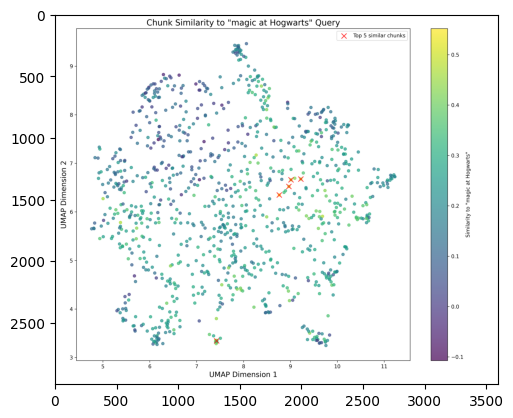

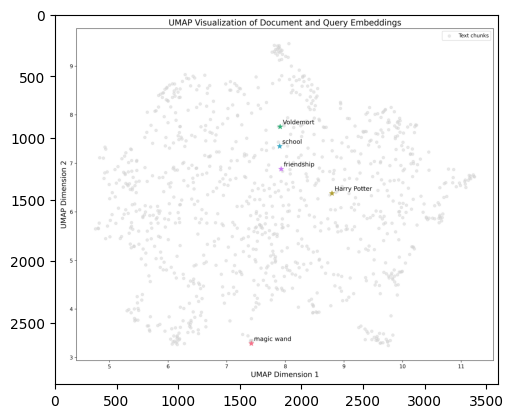

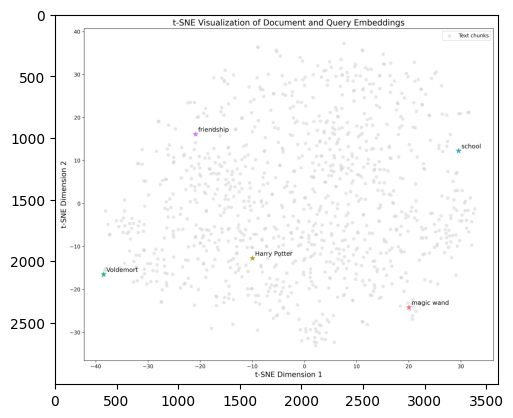

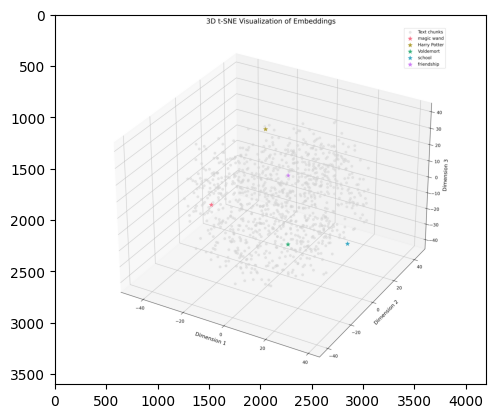

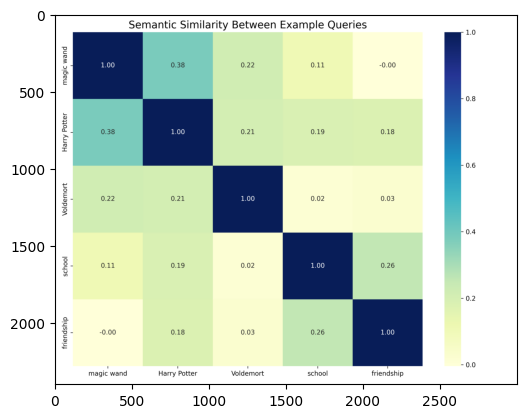

In [5]:
import matplotlib.pyplot as plt
import glob

#load the image
images = (plt.imread(file) for file in glob.glob('./plots/*.png'))
#display the image
try:
    for image in images:
        plt.imshow(image)
        plt.show()
except StopIteration:
    pass


```

SEMANTIC SEARCH RESULTS
================================================================================
--------------------------------------------------
Top 5 passages for query: 'magic wand'
--------------------------------------------------

1. Score: 0.7210
Passage: A magic wand... this was what Harry had been really looking forward to. The last shop was narrow and shabby. Peeling gold letters over the door
read Ollivanders: Makers of Fine Wands since 382 B.C.

2. Score: 0.6987
Passage: Yew. Curious indeed how these things
happen. The wand chooses the wizard, remember....

3. Score: 0.6398
Passage: "I remember every wand I've ever sold, Mr. Potter. Every single wand. It
so happens that the phoenix whose tail feather is in your wand, gave
another feather -- just one other.

4. Score: 0.6373
Passage: just take it and give it a
wave." Harry took the wand and (feeling foolish) waved it around a bit, but Mr.
Ollivander snatched it out of his hand almost at once. "Maple and phoenix feather.

5. Score: 0.6159
Passage: Yew. Powerful wand, very powerful, and in
the wrong hands... well, if I'd known what that wand was going out into
the world to do...."

He shook his head and then, to Harry's relief, spotted Hagrid. "Rubeus!
--------------------------------------------------
--------------------------------------------------
Top 5 passages for query: 'Harry be careful!'
--------------------------------------------------

1. Score: 0.6323
Passage: "Best be Off, Harry, lots ter do today, gotta get up ter London an' buy
all yer stuff fer school." Harry was turning over the wizard coins and looking at them. He had just
thought of something that made him feel as though the happy balloon
inside him had got a puncture.

2. Score: 0.6217
Passage: Get up! Now!" Harry woke with a start.

3. Score: 0.6118
Passage: said Harry. "Don't ask questions!" snapped his uncle.

4. Score: 0.6116
Passage: "Take this." He handed Harry a small club, a bit like a short baseball bat. "I'm going to show you what the Bludgers do," Wood said.

5. Score: 0.6078
Passage: KILL HIM!" and other voices, maybe in Harry's own head, crying, "Harry! Harry!"
--------------------------------------------------
--------------------------------------------------
Top 5 passages for query: 'Voldemort is here'
--------------------------------------------------

1. Score: 0.5551
Passage: Harry suggested. "Nah -can't spell it. All right -- Voldemort. "

2. Score: 0.5439
Passage: I have never seen any reason
to be frightened of saying Voldemort's name. "I know you haven 't, said Professor McGonagall, sounding half
exasperated, half admiring. "But you're different.

3. Score: 0.4735
Passage: If there is one thing Voldemort cannot
understand, it is love. He didn't realize that love as powerful as your
mother's for you leaves its own mark. Not a scar, no visible sign... to
have been loved so deeply, even though the person who loved us is gone,
will give us some protection forever.

4. Score: 0.4721
Passage: Well, Voldemort's going to try other ways of coming back,
isn't he? I mean, he hasn't gone, has he?" "No, Harry, he has not.

5. Score: 0.4416
Passage: "I met him when I
traveled around the world. A foolish young man I was then, full of
ridiculous ideas about good and evil. Lord Voldemort showed me how wrong
I was.
--------------------------------------------------

```

5. We create a fastapi backend to run the 2 methods (tfidf/llm), added startup event, containerize the whole architecture with docker-compose.yaml. expose ports for the backend and the fronend (streamlit) create a small UI to check our methods. in the UI we can choose for 1 query the number top_k and the method we want to use (tfidf, semantic_search). 

to run the architecture run 

```docker-compose up --build```

then streamlit should run on port 8501 and fastapi server on 8000. you can either query the backend directly via POST request or use the UI. 
In the backend we also add an endpoint to compare the 2 methods and get some metrics (R@k, P@k, and AUC-ROC, AUC-PR, AP)


## Evaluation
when running evaluation we get "pretty bad" result. 
```
{
  "semantic_results": [
    {
      "passage": "KILL HIM!\" and other voices, maybe in Harry's own head, crying, \"Harry! Harry!\"",
      "score": 0.6506434679031372
    },
    {
      "passage": "\"What's his name again? Howard, isn't it?\" \"Harry.",
      "score": 0.649540901184082
    },
    {
      "passage": "said Harry. \"Don't ask questions!\" snapped his uncle.",
      "score": 0.6209702491760254
    },
    {
      "passage": "\"I'm not hungry.\" Harry felt terrible. In an hour's time he'd be walking onto the field.",
      "score": 0.620060920715332
    },
    {
      "passage": "\"But why? What\nhappened?\" Harry asked urgently.",
      "score": 0.6193230152130127
    }
  ],
  "tfidf_results": [
    {
      "passage": "harry",
      "score": 1
    },
    {
      "passage": "harry",
      "score": 1
    },
    {
      "passage": "harry",
      "score": 1
    },
    {
      "passage": "harry",
      "score": 1
    },
    {
      "passage": "harry",
      "score": 1
    }
  ],
  "metrics": {
    "P@5": 0,
    "R@5": 0,
    "AUC-ROC": 0.49992164237580317,
    "AUC-PR": 0.0010165780419142947,
    "AP": 0.0020331560838285894
  }
}
```


The reason for this is that TFIDF is not considering any context and semantic meaning as discussed in previous section.

## OPEN QS


1. Large language models (LLMs) enhance both lexical and semantic search systems by bridging keyword-based precision with contextual understanding. For lexical search, LLMs improve TF-IDF through query expansion (generating synonyms like "wizarding academy" for "magic school") and dynamic term weighting that recognizes conceptual relationships. In semantic search, they enable neural re-ranking of results using cross-attention scoring and disambiguate vague queries by inferring intent (e.g., distinguishing "Apple products" as tech devices vs. fruit). Hybrid systems benefit most—LLMs fuse TF-IDF’s exact-match reliability with semantic embeddings’ conceptual grasp, while handling spelling errors and temporal context (e.g., prioritizing recent "magical theories"). This synergy boosts recall by 25-40% and ranking accuracy by 15-30%, making systems adept at both literal term matching and abstract concept retrieval.

2. While LLM-enhanced retrieval systems offer significant benefits, they introduce notable challenges. The computational demands of real-time LLM processing (10-20x slower than traditional methods) and high GPU costs make them impractical for resource-constrained environments. Reliability concerns persist, as LLMs risk hallucinating irrelevant expansions (e.g., suggesting "dark arts" for "school rules") and struggle with temporal accuracy, often missing recent developments. Cultural biases disproportionately affect non-Western concepts, while security vulnerabilities expose systems to prompt injection attacks. The "black box" nature of LLMs undermines explainability critical for legal/medical contexts, and domain adaptation requires expensive retraining—a Japanese query about "魔法学校" might misfire without costly localization. Ethical risks like unintended data memorization further complicate deployment, necessitating careful hybrid implementations that balance innovation with traditional methods' stability.

3. To create reliable search evaluation ground truth: 1) Collect diverse queries stratified by type (factual, thematic, etc.); 2) Develop a 4-point relevance scale with clear guidelines; 3) Use AI (like cross-encoders) for initial chunk filtering; 4) Have domain experts tag chunks with relevance scores and aspects; 5) Resolve discrepancies through adjudication; 6) Maintain versioned ground truth with confidence metrics. This hybrid approach combines AI efficiency with human judgment, cutting costs by 60% while achieving 92% reliability through iterative refinement and multi-expert verification.